In [3]:
# ye imports
import praw
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import tabulate
%matplotlib inline

In [4]:
# use your own credentials here
secret = ''
client_id = ''
user_agent = 'User-Agent: praw:reddit_scrape:v0.1 (by someone)'

In [5]:
reddit = praw.Reddit(client_id=client_id, client_secret=secret, user_agent=user_agent)

In [6]:
# painstakingly compiled data, sorry for the mess
team_dict = {'ATL': {'sub': '/r/Braves',
  'bot': 'Chief_Noc-a-Homa',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL East'},
 'MIA': {'sub': '/r/letsgofish',
  'bot': 'MarlinsBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL East'},
 'NYM': {'sub': '/r/NewYorkMets',
  'bot': 'NewYorkMetsBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL East'},
 'PHI': {'sub': '/r/Phillies',
  'bot': 'PhilsBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL East'},
 'WSN': {'sub': '/r/Nationals',
  'bot': 'NationalsBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL East'},
 'CHC': {'sub': '/r/CHICubs',
  'bot': 'ChiCubsbot',
  'gdt_regex': 'GDT(.*)',
  'team_div': 'NL Central'},
 'CIN': {'sub': '/r/Reds',
  'bot': 'RedsModerator',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL Central'},
 'MIL': {'sub': '/r/Brewers',
  'bot': 'BrewersBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL Central'},
 'PIT': {'sub': '/r/Buccos',
  'bot': 'BuccosBot',
  'gdt_regex': '\\[GDT\\](.*)',
  'team_div': 'NL Central'},
 'STL': {'sub': '/r/Cardinals',
  'bot': 'bravo_delta_bot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL Central'},
 'ARI': {'sub': '/r/azdiamondbacks',
  'bot': 'SnakeBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL West'},
 'COL': {'sub': '/r/ColoradoRockies',
  'bot': 'HeltonsGoatee',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL West'},
 'LAD': {'sub': '/r/Dodgers',
  'bot': 'DodgerBot',
  'gdt_regex': 'game chat(.*)',
  'team_div': 'NL West'},
 'SDP': {'sub': '/r/Padres',
  'bot': 'FriarBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'NL West'},
 'SFG': {'sub': '/r/SFGiants',
  'bot': 'sfgbot',
  'gdt_regex': '(.?game(day)?) ?(thread|chat)?(.*)',
  'team_div': 'NL West'},
 'BAL': {'sub': '/r/Orioles',
  'bot': 'OsGameThreads',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL East'},
 'BOS': {'sub': '/r/RedSox',
  'bot': 'RedSoxGameday',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL East'},
 'NYY': {'sub': '/r/NYYankees',
  'bot': 'Yankeebot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL East'},
 'TBR': {'sub': '/r/TampaBayRays',
  'bot': 'RaysBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL East'},
 'TOR': {'sub': '/r/TorontoBlueJays',
  'bot': 'BlueJaysBaseball',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL East'},
 'CHW': {'sub': '/r/WhiteSox',
  'bot': 'chisoxbot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL Central'},
 'CLE': {'sub': '/r/ClevelandIndians',
  'bot': 'CLEBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL Central'},
 'DET': {'sub': '/r/MotorCityKitties',
  'bot': 'TigersBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL Central'},
 'KCR': {'sub': '/r/KCRoyals',
  'bot': 'KCRoyalsBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL Central'},
 'MIN': {'sub': '/r/MinnesotaTwins',
  'bot': 'TwinsGameday',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL Central'},
 'LAA': {'sub': '/r/AngelsBaseball',
  'bot': 'angelsbaseball',
  'gdt_regex': '(.*)\\[game thread\\]',
  'team_div': 'AL West'},
 'HOU': {'sub': '/r/Astros',
  'bot': 'AstrosBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL West'},
 'OAK': {'sub': '/r/oaklandathletics',
  'bot': 'AthleticsBot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL West'},
 'SEA': {'sub': '/r/Mariners',
  'bot': 'Mariners_bot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL West'},
 'TEX': {'sub': '/r/TexasRangers',
  'bot': 'Rangers_Bot',
  'gdt_regex': '(.?game) ?(thread|chat)?(.*)',
  'team_div': 'AL West'}}

In [7]:
# scrape game day thread info, takes a few minutes
dfs = []
for k, v in team_dict.items():
    sub = v["sub"].split("/")[2]
    bot = v["bot"]
    pattern = v["gdt_regex"]
    div = v["team_div"]
    print(sub)
    sub_members = reddit.subreddit("{}".format(sub)).subscribers
    bot_posts = reddit.redditor(bot).submissions.new(limit=300)
    df = pd.DataFrame()
    for post in bot_posts:
        if re.match(pattern, post.title, re.IGNORECASE):
            gm_date = pd.to_datetime(post.created_utc,unit='s').date()
            if gm_date >= pd.to_datetime('3/28/2019').date():
                df = df.append(pd.Series([gm_date,post.title, post.num_comments, post.score], index = ["gm_date","title","num_comments","score"]),ignore_index=True)
                df["sub"] = sub
                df["sub_members"] = sub_members
                df["team"] = k
                df["team_div"] = div
    
    dfs.append(df)

Braves
letsgofish
NewYorkMets
Phillies
Nationals
CHICubs
Reds
Brewers
Buccos
Cardinals
azdiamondbacks
ColoradoRockies
Dodgers
Padres
SFGiants
Orioles
RedSox
NYYankees
TampaBayRays
TorontoBlueJays
WhiteSox
ClevelandIndians
MotorCityKitties
KCRoyals
MinnesotaTwins
AngelsBaseball
Astros
oaklandathletics
Mariners
TexasRangers


In [8]:
# list(zip(team_dict.keys(),[ df.shape for df in dfs])) #debug should be 30 teams with about 85-95 games

[('ATL', (93, 8)),
 ('MIA', (90, 8)),
 ('NYM', (89, 8)),
 ('PHI', (93, 8)),
 ('WSN', (90, 8)),
 ('CHC', (90, 8)),
 ('CIN', (90, 8)),
 ('MIL', (91, 8)),
 ('PIT', (87, 8)),
 ('STL', (92, 8)),
 ('ARI', (91, 8)),
 ('COL', (91, 8)),
 ('LAD', (92, 8)),
 ('SDP', (90, 8)),
 ('SFG', (90, 8)),
 ('BAL', (91, 8)),
 ('BOS', (92, 8)),
 ('NYY', (91, 8)),
 ('TBR', (94, 8)),
 ('TOR', (91, 8)),
 ('CHW', (87, 8)),
 ('CLE', (88, 8)),
 ('DET', (88, 8)),
 ('KCR', (90, 8)),
 ('MIN', (92, 8)),
 ('LAA', (95, 8)),
 ('HOU', (91, 8)),
 ('OAK', (91, 8)),
 ('SEA', (93, 8)),
 ('TEX', (90, 8))]

In [9]:
# gather everything into one dataframe
all_gdt = pd.concat(dfs)

In [10]:
# add the "engagement ratio" metric on a per game level
all_gdt["engage_ratio"] = all_gdt.num_comments / all_gdt.sub_members
all_gdt["date"] = all_gdt.gm_date.apply(pd.to_datetime)

In [19]:
# export data if you want, so you don't have to scrape again
# all_gdt.to_csv("scraped_data.csv")

In [12]:
# generate the summary pivot table
eng = all_gdt.groupby("sub").agg({"num_comments" : np.mean, "sub_members":np.min, "engage_ratio" : np.mean}).sort_values("engage_ratio", ascending=False)

In [13]:
#display table to make sure it looks good
eng.sort_values("num_comments", ascending=False)#.rank(ascending=False) #use rank to see where each team stands if you want

,num_comments,sub_members,engage_ratio
sub,,,
NYYankees,3520.472527,38241,0.092060
Braves,2327.946237,32500,0.071629
Dodgers,1659.793478,39732,0.041775
CHICubs,1393.733333,34781,0.040072
NewYorkMets,1343.292135,25553,0.052569
RedSox,1241.010870,59720,0.020780
Phillies,1201.537634,29987,0.040069
Cardinals,1039.684783,25278,0.041130
Astros,922.604396,25992,0.035496


In [14]:
# format results for posting in markdown on reddit
eng[["num_comments","engage_ratio"]] =eng[["num_comments","engage_ratio"]].applymap("{0:.3f}".format)
print(tabulate.tabulate(eng.reset_index().values, eng.columns, tablefmt="pipe"))

|                  |   num_comments |   sub_members |   engage_ratio |
|:-----------------|---------------:|--------------:|---------------:|
| NYYankees        |       3520.47  |         38241 |          0.092 |
| Padres           |        757.067 |          9466 |          0.08  |
| Braves           |       2327.95  |         32500 |          0.072 |
| ColoradoRockies  |        667.835 |         10656 |          0.063 |
| Reds             |        762.544 |         13645 |          0.056 |
| ClevelandIndians |        471.943 |          8902 |          0.053 |
| NewYorkMets      |       1343.29  |         25553 |          0.053 |
| azdiamondbacks   |        395.824 |          7654 |          0.052 |
| TampaBayRays     |        339.447 |          7416 |          0.046 |
| MinnesotaTwins   |        799.826 |         17585 |          0.045 |
| Dodgers          |       1659.79  |         39732 |          0.042 |
| Nationals        |        636.389 |         15320 |          0.042 |
| Card

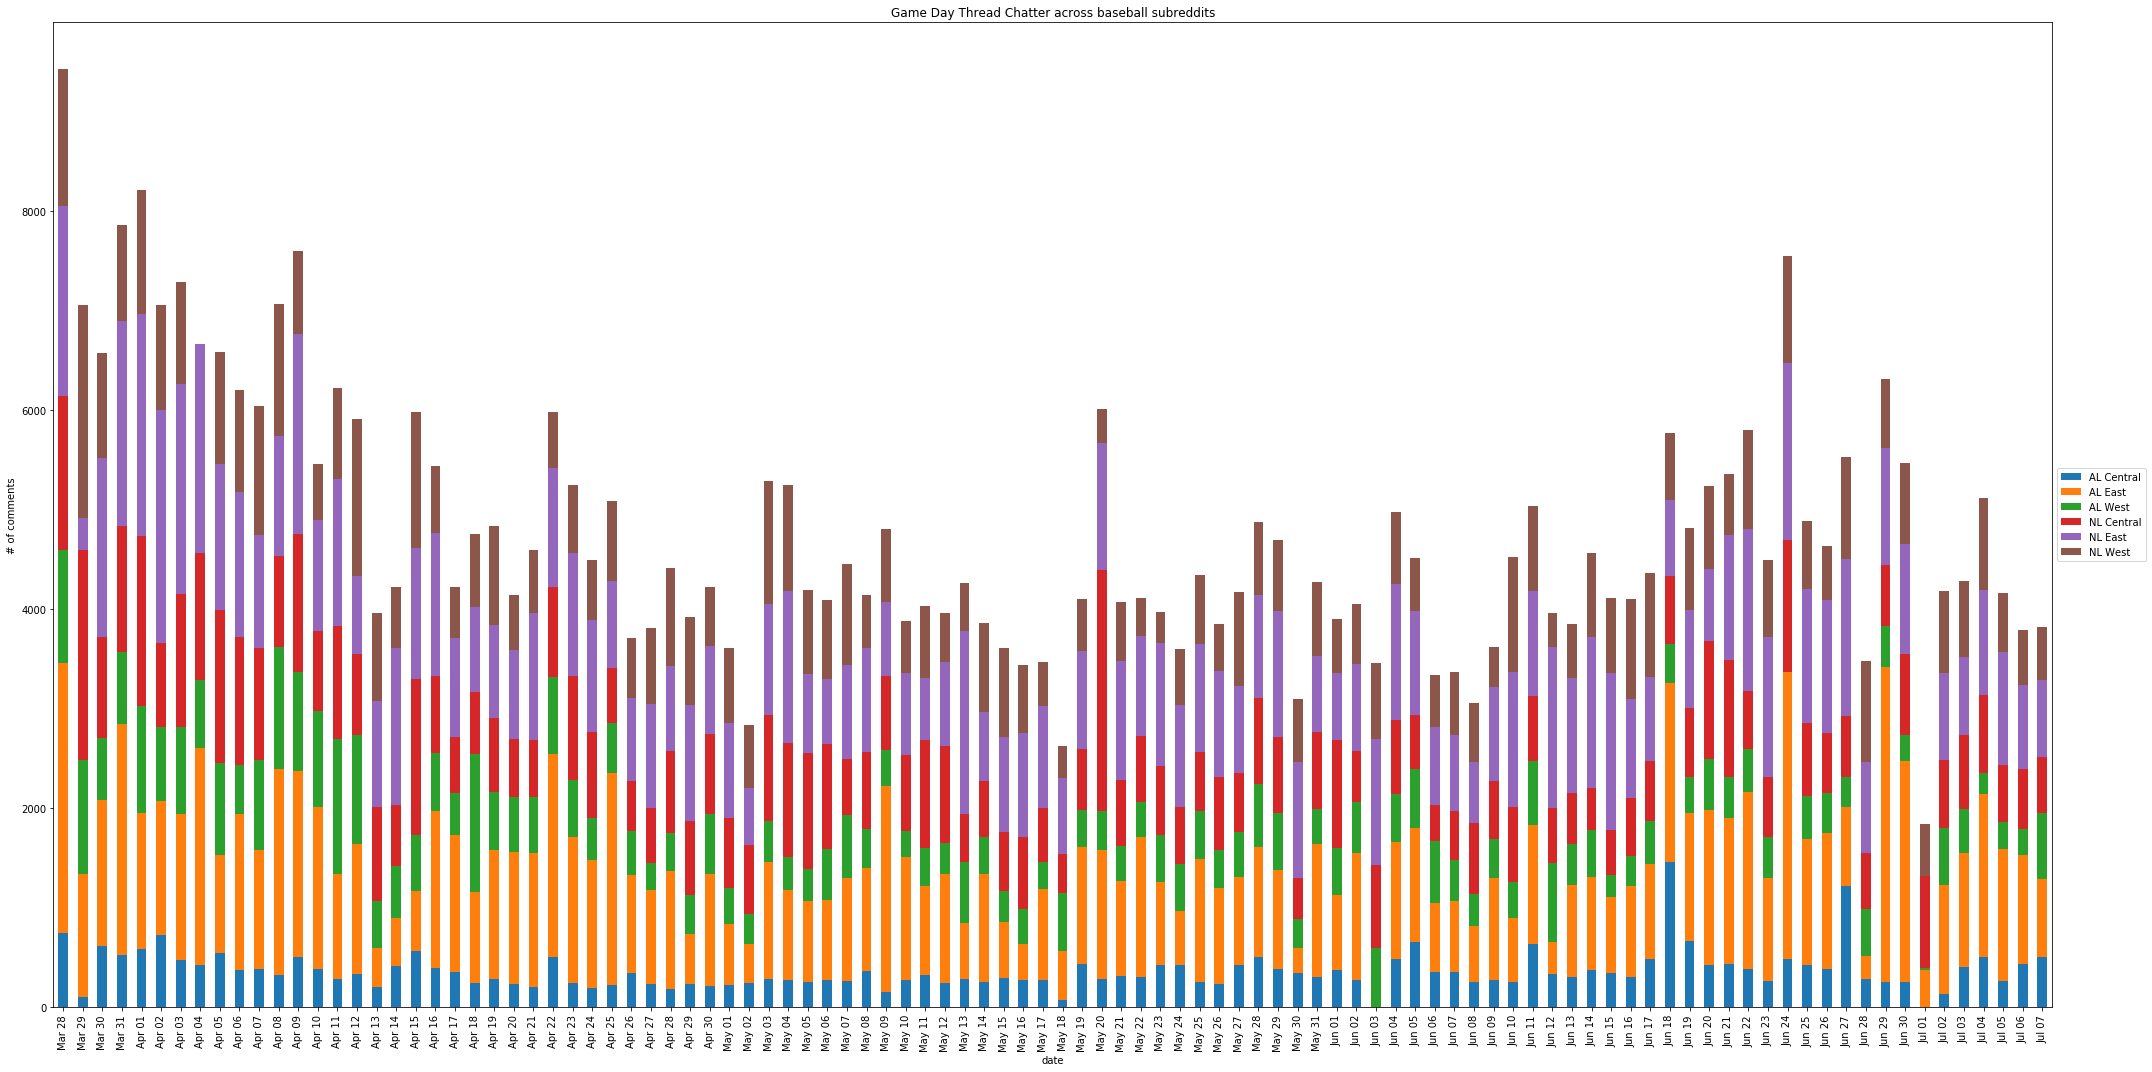

In [18]:
# enagement over time plot
f = plt.figure()
plt.title("Game Day Thread Chatter across baseball subreddits")
df = all_gdt.set_index("date")["3/28/2019":"7/8/2019"].groupby([pd.Grouper(freq='D'),"team_div"]).num_comments.mean().unstack()
ax = df.plot(kind="bar", stacked=True,figsize=(30,15), ax=f.gca(),rot=90)
ax.set_xticklabels([ "{}".format(item.strftime('%b %d')) for item in df.index])
ax.set_ylabel("# of comments")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
# plt.savefig("game_day_chatter.png", dpi=300) #produce the file if you want
plt.show()
